<a href="https://colab.research.google.com/github/Preeti27092000/nestle_linear_reg_capstone/blob/main/nestle_inear_reg_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NESTLE INDIA STOCK PRICE PREDICTION ALGORITHM 

**Nestlé India Limited is the Indian subsidiary of Nestlé which is a Swiss multinational company.The company's products include food, beverages, chocolate, and confectioneries.**

## Problem Statement

**Here we are working to predict Nestle stock price on the basis of data we collected from the day 1 when it entered into Stock 
market. On the basis of different external factors and past behaviour of data we need to predict how it will perform in specific condition.**

## Approach

**As this problem predicts stock price it is numerical category problem where result can be any number, hence it is Continuous
distribution problem where we can apply Linear Regression Algorithm.Here we will also try to consider the effect of Time Series analysis and economic factors.**

## Steps are as follows : 

# Import necessary libraries

In [1]:
# pandas = used to load and read data
import pandas as pd
# numpy = used to do calculation between dataframe columns
import numpy as np
# matplotlib.pyplot = used to visualise data using various graph methods available in it
import matplotlib.pyplot as plt

#  Load and read data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file = "/content/drive/MyDrive/Copy of NESTLEIND_daily_full.csv"

In [4]:
# read the csv file 
df_nestle = pd.read_csv(file)
# check 1st five rows of each column of dataframe
df_nestle.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,508.100006,512.549988,505.000000,505.149994,415.997742,7100.0
1,2002-08-13,503.500000,515.000000,503.500000,509.049988,419.209534,8800.0
2,2002-08-14,502.100006,515.000000,502.100006,514.400024,423.615234,18700.0
3,2002-08-15,514.400024,514.400024,514.400024,514.400024,423.615234,0.0
4,2002-08-16,516.000000,516.849976,510.000000,511.000000,420.815247,9400.0


# Data Profiling

In [5]:
# to check the shape of the dataframe
# returns as (rows,columns)
df_nestle.shape

(4826, 7)

**--> There are 4826 observations (rows) and 7 features (columns) in dataframe.**

In [6]:
# to get the name of each column
df_nestle.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# to get the information about the data
# it will return column name and its datatypes as well number of rows where each cell contains some value(non-null number)
df_nestle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4826 entries, 0 to 4825
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4826 non-null   object 
 1   Open       4819 non-null   float64
 2   High       4819 non-null   float64
 3   Low        4819 non-null   float64
 4   Close      4819 non-null   float64
 5   Adj Close  4819 non-null   float64
 6   Volume     4819 non-null   float64
dtypes: float64(6), object(1)
memory usage: 264.0+ KB


**--> Here we can see there can be null values except 'Date' column**

In [8]:
# to check the basic statistics of each column
# count = Number of rows where element is present
# mean  = average
# std = Standard deviation used to know in what range and how far data is distributed
# min = minimum value
# 25% = 1st quartile which means 25% of the data is below the q1 value
# 50% = 2nd quartile which means 50% of the data is below the q2 value (median)
# 75% = 3rd quartile which means 75% of the data is below the q3 value
# max = maximum value of the data 
df_nestle.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4.819000e+03
mean,5204.690766,5260.786466,5145.069648,5201.452563,4838.138436,3.469234e+04
std,5292.899033,5349.956141,5229.311467,5289.042545,5162.053461,6.186095e+04
min,502.100006,512.549988,498.049988,505.149994,415.997742,0.000000e+00
25%,527.049988,527.049988,527.049988,527.049988,441.999664,0.000000e+00
50%,4436.000000,4479.000000,4396.000000,4434.000000,3875.172607,1.450600e+04
75%,6801.350098,6860.125000,6725.125000,6795.324951,6184.599853,4.544950e+04
max,20450.000000,20609.150391,20230.000000,20457.199219,20164.644531,1.106746e+06


**--> Here we can see there are most columns present where mean and median are almost at same range. But if we find large difference between mean and median, then there are chanced to have outliers.**

**--> Outliers are nothing but extremely high or low values which are out of range of column and it affects mean value** 

**[*] Value counts of categorical column**


**--> No need to do this as only column 'Date' is categorical**

**[*] Drop unnecessary column say Adj Close**

In [9]:
df_nestle.drop('Adj Close',axis = 1,inplace = True)

# Check null values

In [10]:
# isnull() = checks is there any null value row-wise, returns True if there are null values
# sum() = gives sum of rows where there is null value
df_nestle.isnull().sum()

Date      0
Open      7
High      7
Low       7
Close     7
Volume    7
dtype: int64

**--> All columns have null values except 'Date' column.**

**As this data and project is connected to finance, it is not appropriate to drop null value rows as it can be very important
event to look upon**

In [11]:
null_rows = df_nestle.loc[df_nestle.isna().any(axis = 1)]
null_rows

,Date,Open,High,Low,Close,Volume
1883,2010-02-06,NaN,NaN,NaN,NaN,NaN
2361,2012-01-07,NaN,NaN,NaN,NaN,NaN
2400,2012-03-03,NaN,NaN,NaN,NaN,NaN
2530,2012-09-08,NaN,NaN,NaN,NaN,NaN
2572,2012-11-11,NaN,NaN,NaN,NaN,NaN
2909,2014-03-22,NaN,NaN,NaN,NaN,NaN
3138,2015-02-28,NaN,NaN,NaN,NaN,NaN


In [12]:
a1 = df_nestle.iloc[1882]
a2 = df_nestle.iloc[1883]
a3 = df_nestle.iloc[1884]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[1883] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[1883]

Date       2010-02-06
Open           2576.0
High           2627.0
Low            2506.0
Close     2597.300049
Volume         4916.0
Name: 1883, dtype: object

In [13]:
a1 = df_nestle.iloc[2360]
a2 = df_nestle.iloc[2361]
a3 = df_nestle.iloc[2362]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[2361] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[2361]

Date      2010-02-06
Open         4123.25
High          4148.5
Low           4082.5
Close       4117.375
Volume       16805.5
Name: 2361, dtype: object

In [14]:
a1 = df_nestle.iloc[2399]
a2 = df_nestle.iloc[2400]
a3 = df_nestle.iloc[2401]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[2400] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[2400]

Date       2010-02-06
Open      4449.175049
High      4489.475098
Low       4379.199951
Close     4439.324951
Volume        26614.0
Name: 2400, dtype: object

In [15]:
a1 = df_nestle.iloc[2529]
a2 = df_nestle.iloc[2530]
a3 = df_nestle.iloc[2531]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[2530] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[2530]

Date       2010-02-06
Open      4648.899902
High      4658.399902
Low            4577.5
Close         4596.25
Volume        66783.5
Name: 2530, dtype: object

In [16]:
a1 = df_nestle.iloc[2571]
a2 = df_nestle.iloc[2572]
a3 = df_nestle.iloc[2573]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[2572] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[2572]

Date       2010-02-06
Open      4884.975098
High           4910.0
Low       4824.975098
Close     4833.099853
Volume         6509.5
Name: 2572, dtype: object

In [17]:
a1 = df_nestle.iloc[2908]
a2 = df_nestle.iloc[2909]
a3 = df_nestle.iloc[2910]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[2909] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[2909]

Date       2010-02-06
Open           4800.0
High      4829.899902
Low            4713.0
Close     4726.349853
Volume        28163.5
Name: 2909, dtype: object

In [18]:
a1 = df_nestle.iloc[3137]
a2 = df_nestle.iloc[3138]
a3 = df_nestle.iloc[3139]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[3138] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[3138]

Date       2010-02-06
Open      7047.274902
High      7054.399902
Low       6974.725098
Close     7005.474853
Volume        45861.0
Name: 3138, dtype: object

In [19]:
df_nestle.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Here we can see all null values are being replaced by the mean of previous row and successive row**

# Detecting Outliers

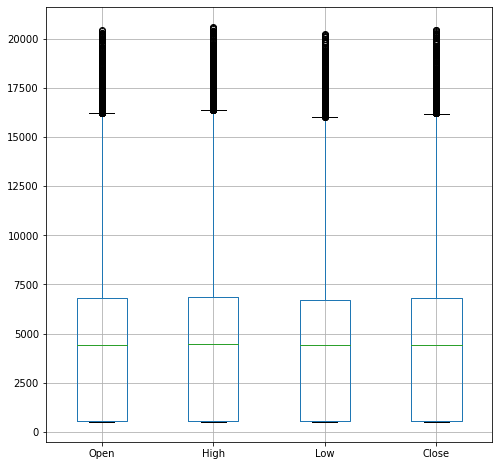

In [20]:
# by using rcParams and its method 'figure.figsize' we can adjust the length and breadh of the figure
plt.rcParams['figure.figsize'] = [8,8]

# using boxplot to check whether data columns has any outlier value
# boxplot indicates maximum value,3rd quartile,median,1st quartile and minimum value with linea and whiskers
# whereas circle shows outliers

df_nestle_temp = df_nestle.copy()
df_nestle_temp.drop('Volume',axis = 1,inplace = True)
df_nestle_temp.boxplot()

# Treatment to outliers

In [21]:
q1 = np.percentile(df_nestle_temp['Open'],25)   # q1 = first quartile using 25%
q3 = np.percentile(df_nestle_temp['Open'],75)   # q3 = third quartile using 75%
iqr = q3 - q1                                   # iqr = inter quartile range , difference between 1st and third quartile
low = q1 - 1.5*iqr                              # low = set threshhold that values 1.5 times of iqr lower than q1 
high = q3 + 1.5*iqr                             # high = set threshhold that values 1.5 times of iqr more than q3 


# criterion : if any value in copy df is lower than q1 or higher than q3 are there in loop, drop that index
for i in df_nestle_temp['Open']:
    if i > high and i < low:
        df_nestle_temp.drop(df_nestle_temp.index[i],inplace = True)

# find mean from the copied df where values not matching criterion are removed        
m1 = float(df_nestle_temp['Open'].mean())        
print("Mean of copied dataframe 'Open' :",m1)

# for any value in original df not matching criterion , then replace it with mean of copied df
for i in df_nestle['Open']:
    if i > high:
        df_nestle['Open'].replace(to_replace = i,value = m1,inplace = True)
for i in df_nestle['Open']:
    if i < low:
        df_nestle['Open'].replace(to_replace = i,value = m1,inplace = True)


Mean of copied dataframe 'Open' : 5203.8819675624745


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


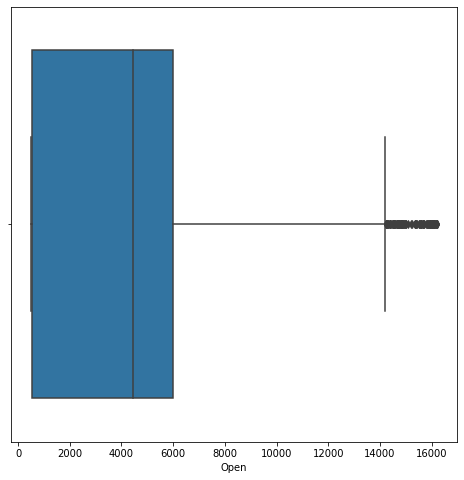

In [22]:
import seaborn as sns             # seaborn is library of python used to visualise graphs and pictorial way efficiently
sns.boxplot(df_nestle['Open'])

In [23]:
q1 = np.percentile(df_nestle_temp['Close'],25)
q3 = np.percentile(df_nestle_temp['Close'],75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

for i in df_nestle_temp['Close']:
    if i > high and i < low:
        df_nestle_temp.drop(df_nestle_temp.index[i],inplace = True)
        
m1 = float(df_nestle_temp['Close'].mean())
m1

for i in df_nestle['Close']:
    if i > high:
        df_nestle['Close'].replace(to_replace = i,value = m1,inplace = True)
for i in df_nestle['Close']:
    if i < low:
        df_nestle['Close'].replace(to_replace = i,value = m1,inplace = True)

In [24]:
q1 = np.percentile(df_nestle_temp['High'],25)
q3 = np.percentile(df_nestle_temp['High'],75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

for i in df_nestle_temp['High']:
    if i > high and i < low:
        df_nestle_temp.drop(df_nestle_temp.index[i],inplace = True)
        
m1 = float(df_nestle_temp['High'].mean())
m1

for i in df_nestle['High']:
    if i > high:
        df_nestle['High'].replace(to_replace = i,value = m1,inplace = True)

for i in df_nestle['High']:
    if i < low:
        df_nestle['High'].replace(to_replace = i,value = m1,inplace = True)        

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


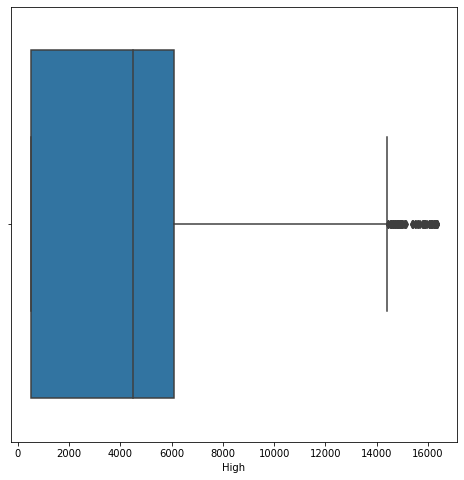

In [25]:
sns.boxplot(df_nestle['High'])

In [26]:
q1 = np.percentile(df_nestle_temp['Low'],25)
q3 = np.percentile(df_nestle_temp['Low'],75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

for i in df_nestle_temp['Low']:
    if i > high and i < low:
        df_nestle_temp.drop(df_nestle_temp.index[i],inplace = True)
        
m1 = float(df_nestle_temp['Low'].mean())
m1
for i in df_nestle['Low']:
    if i > high:
        df_nestle['Low'].replace(to_replace = i,value = m1,inplace = True)
for i in df_nestle['Low']:
    if i < low:
        df_nestle['Low'].replace(to_replace = i,value = m1,inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


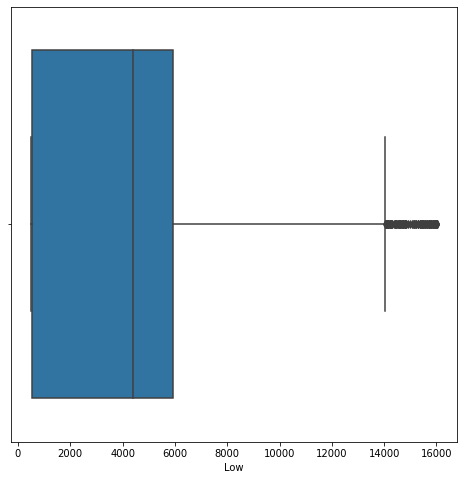

In [27]:
sns.boxplot(df_nestle['Low'])

In [28]:
# convert all columns into numeric datatype
df_nestle[['Open', 'High', 'Low', 'Close']] = df_nestle[['Open', 'High', 'Low', 'Close']].apply(pd.to_numeric)

In [29]:
df_nestle1 = df_nestle.drop('Volume',axis = 1)

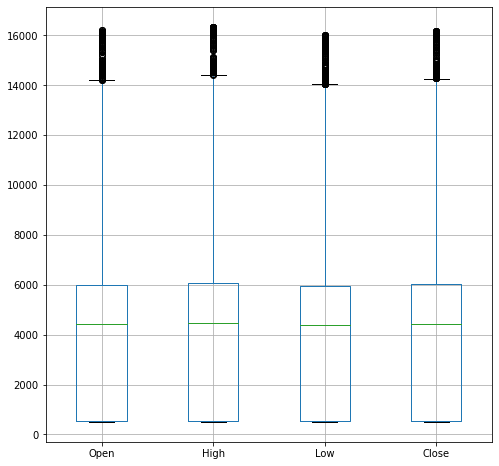

In [30]:
df_nestle1.boxplot()

In [31]:
df_nestle_copy = df_nestle.copy()
df_nestle_copy

,Date,Open,High,Low,Close,Volume
0,2002-08-12,508.100006,512.549988,505.000000,505.149994,7100.0
1,2002-08-13,503.500000,515.000000,503.500000,509.049988,8800.0
2,2002-08-14,502.100006,515.000000,502.100006,514.400024,18700.0
3,2002-08-15,514.400024,514.400024,514.400024,514.400024,0.0
4,2002-08-16,516.000000,516.849976,510.000000,511.000000,9400.0
...,...,...,...,...,...,...
4821,2021-12-24,5203.881968,5259.935278,5144.249593,5200.604036,34220.0
4822,2021-12-27,5203.881968,5259.935278,5144.249593,5200.604036,26588.0
4823,2021-12-28,5203.881968,5259.935278,5144.249593,5200.604036,21049.0
4824,2021-12-29,5203.881968,5259.935278,5144.249593,5200.604036,29269.0


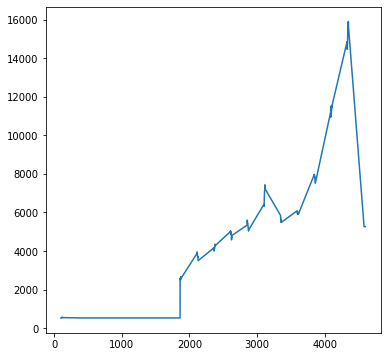

In [58]:
l = []
for i in df_nestle_copy['Date']:
    a = i[0:4]
    l.append(a)

df_nestle_copy['Year'] = pd.Series(l)
df_nestle_copy

l1 = []
for i in df_nestle_copy['Date']:
    a = i[5:7]
    l1.append(a)

df_nestle_copy['Month'] = pd.Series(l1)
df_nestle_copy

l2 = []
for i in df_nestle_copy['Date']:
    a = i[8:10]
    l2.append(a)

df_nestle_copy['Day'] = pd.Series(l2)
df_nestle_copy

x = df_nestle_copy[(df_nestle_copy['Month'] == '01')]
x

b = x['High'].plot()


In [62]:
df_nestle_copy[['Year','Month','Day']] = df_nestle_copy[['Year','Month','Day']].astype(np.number)
df_nestle_copy.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
Year      float64
Month     float64
Day       float64
dtype: object

In [117]:
a = df_nestle_copy.groupby(['Year'])['High'].max()
a1 = pd.DataFrame(a.reset_index())
print(a1.head())

     Year        High
0  2002.0  591.000000
1  2003.0  568.000000
2  2004.0  527.049988
3  2005.0  527.049988
4  2006.0  527.049988


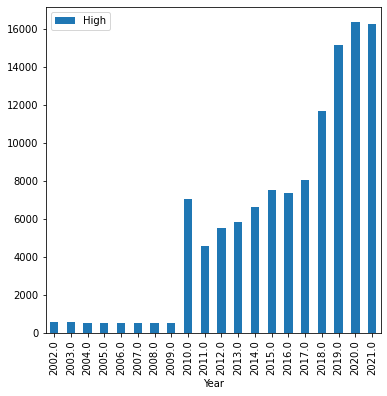

In [114]:
a1.plot.bar(x = 'Year',y = 'High')

In [32]:
# to make line graphs ,'Date' column is needed to be at index so we use set_index method to change index to 'Date'
df_nestle = df_nestle.set_index('Date')

# Data Visualisation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Trend of "Close" column during years')

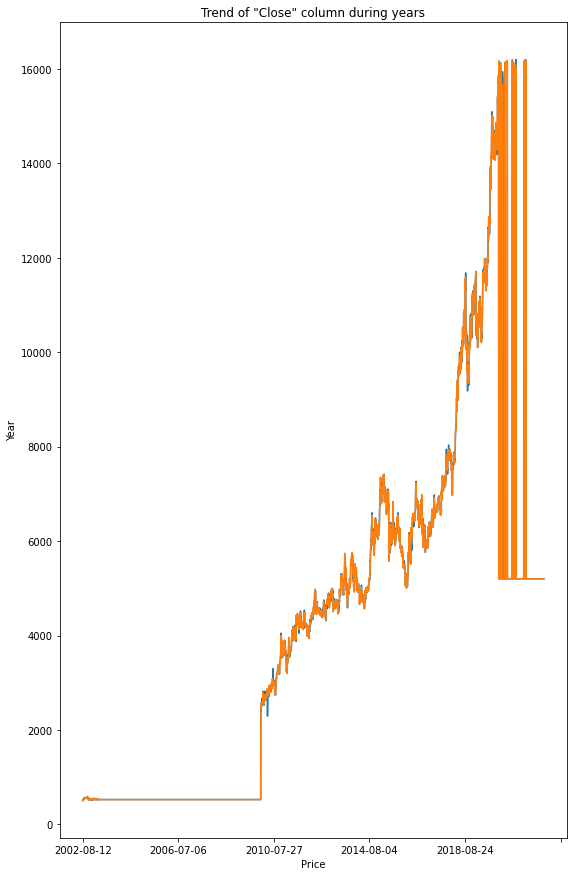

In [33]:
plt.rcParams['figure.figsize'] = [20,15]
# subplot = module or method of python, needed to visualise more than one graphs together by placing it side by side
# subplot(total rows,columns needed in each row,index at which column which graph is to be placed)
plt.subplot(1,2,1)
b = df_nestle['Open'].plot() 
plt.xlabel('Price')          
plt.ylabel('Year')
plt.title('Trend of "Open" column during years') 
# using plot method gor line graph by default
plt.subplot(1,2,1)
a = df_nestle['Close'].plot()
plt.xlabel('Price')          
plt.ylabel('Year')
plt.title('Trend of "Close" column during years') 


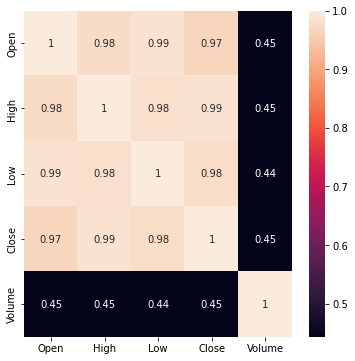

In [34]:
plt.rcParams['figure.figsize'] = [6,6]
# using seaborn method called heatmap to check correlation among columns
# annot = True means correlation figure can be seen
sns.heatmap(df_nestle.corr(),annot = True)

In [87]:
df_nestle_copy.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2002-08-12,508.100006,512.549988,505.000000,505.149994,7100.0,2002.0,8.0,12.0
1,2002-08-13,503.500000,515.000000,503.500000,509.049988,8800.0,2002.0,8.0,13.0
2,2002-08-14,502.100006,515.000000,502.100006,514.400024,18700.0,2002.0,8.0,14.0
3,2002-08-15,514.400024,514.400024,514.400024,514.400024,0.0,2002.0,8.0,15.0
4,2002-08-16,516.000000,516.849976,510.000000,511.000000,9400.0,2002.0,8.0,16.0


In [145]:
a = df_nestle_copy[(df_nestle_copy.Month == 1)]
a1 = a.groupby(['Year'])['Close'].max()
a1 = pd.DataFrame(a1.reset_index())

b = df_nestle_copy[(df_nestle_copy.Month == 2)]
b1 = b.groupby(['Year'])['Close'].max()
b1 = pd.DataFrame(b1.reset_index())

c = df_nestle_copy[(df_nestle_copy.Month == 3)]
c1 = c.groupby(['Year'])['Close'].max()
c1 = pd.DataFrame(c1.reset_index())

d = df_nestle_copy[(df_nestle_copy.Month == 4)]
d1 = d.groupby(['Year'])['Close'].max()
d1 = pd.DataFrame(d1.reset_index())

e = df_nestle_copy[(df_nestle_copy.Month == 5)]
e1 = e.groupby(['Year'])['Close'].max()
e1 = pd.DataFrame(e1.reset_index())

f = df_nestle_copy[(df_nestle_copy.Month == 6)]
f1 = f.groupby(['Year'])['Close'].max()
f1 = pd.DataFrame(f1.reset_index())

g = pd.concat([a1,b1,c1,d1,e1,f1],axis = 1)
g.columns = ['ym1','cm1','ym2','cm2','ym3','cm3','ym4','cm4','ym5','cm5','ym6','cm6']
g.drop(['ym2','ym3','ym4','ym5','ym6'],axis = 1,inplace = True)
g.set_index('ym1')

,cm1,cm2,cm3,cm4,cm5,cm6
ym1,,,,,,
2003.0,552.299988,540.700012,536.849976,527.049988,527.049988,527.049988
2004.0,527.049988,527.049988,527.049988,527.049988,527.049988,527.049988
2005.0,527.049988,527.049988,527.049988,527.049988,527.049988,527.049988
2006.0,527.049988,527.049988,527.049988,527.049988,527.049988,527.049988
2007.0,527.049988,527.049988,527.049988,527.049988,527.049988,527.049988
2008.0,527.049988,527.049988,527.049988,527.049988,527.049988,527.049988
2009.0,527.049988,527.049988,527.049988,527.049988,527.049988,527.049988
2010.0,2586.850098,7005.474853,2745.199951,2877.399902,2948.600098,2996.800049
2011.0,3900.949951,3548.699951,3964.649902,3992.899902,4176.250000,4181.100098


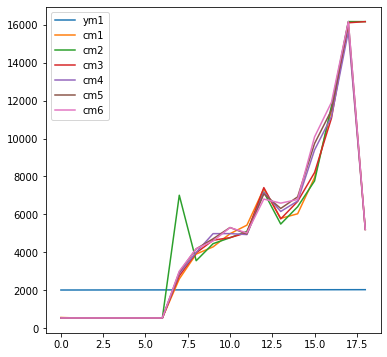

In [143]:
g.plot.line()

In [35]:
#@title Separate columns as per datatype

In [36]:
df_nestle_num = df_nestle.select_dtypes(include = 'number') # select_dtypes is applied on data frame to bring specific datatype columns in single format
df_nestle_num

,Open,High,Low,Close,Volume
Date,,,,,
2002-08-12,508.100006,512.549988,505.000000,505.149994,7100.0
2002-08-13,503.500000,515.000000,503.500000,509.049988,8800.0
2002-08-14,502.100006,515.000000,502.100006,514.400024,18700.0
2002-08-15,514.400024,514.400024,514.400024,514.400024,0.0
2002-08-16,516.000000,516.849976,510.000000,511.000000,9400.0
...,...,...,...,...,...
2021-12-24,5203.881968,5259.935278,5144.249593,5200.604036,34220.0
2021-12-27,5203.881968,5259.935278,5144.249593,5200.604036,26588.0
2021-12-28,5203.881968,5259.935278,5144.249593,5200.604036,21049.0


In [37]:
# separate target from main dataframe
df_nestle_target = df_nestle['Close']   

In [38]:
# separate target fro numerical datatype dataframe
df_nestle_num_without_target = df_nestle_num.drop('Close',axis = 1)

# Scaling

In [39]:
# import module StandardScaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [40]:
# initialise or make object of StandardScaler class
ss = StandardScaler()

In [41]:
# The fit method is calculating the mean and variance of each of the features present in our data. 
# The transform method is transforming all the features using the respective mean and variance.
scaled = ss.fit_transform(df_nestle_num)
df_nestle_scaled = pd.DataFrame(scaled,columns = df_nestle_num.columns)
df_nestle_scaled

,Open,High,Low,Close,Volume
0,-0.994846,-0.992465,-0.995392,-0.992616,-0.446211
1,-0.996113,-0.991801,-0.995811,-0.991549,-0.418709
2,-0.996499,-0.991801,-0.996201,-0.990085,-0.258554
3,-0.993112,-0.991963,-0.992772,-0.990085,-0.561069
4,-0.992671,-0.991299,-0.993998,-0.991015,-0.409003
...,...,...,...,...,...
4821,0.298109,0.294351,0.297944,0.292261,-0.007483
4822,0.298109,0.294351,0.297944,0.292261,-0.130948
4823,0.298109,0.294351,0.297944,0.292261,-0.220554
4824,0.298109,0.294351,0.297944,0.292261,-0.087577


In [42]:
# remove target variable from scaled data
df_nestle_new = df_nestle_scaled.drop('Close',axis = 1)

In [43]:
df_nestle_new

,Open,High,Low,Volume
0,-0.994846,-0.992465,-0.995392,-0.446211
1,-0.996113,-0.991801,-0.995811,-0.418709
2,-0.996499,-0.991801,-0.996201,-0.258554
3,-0.993112,-0.991963,-0.992772,-0.561069
4,-0.992671,-0.991299,-0.993998,-0.409003
...,...,...,...,...
4821,0.298109,0.294351,0.297944,-0.007483
4822,0.298109,0.294351,0.297944,-0.130948
4823,0.298109,0.294351,0.297944,-0.220554
4824,0.298109,0.294351,0.297944,-0.087577


In [44]:
df_nestle2 = df_nestle_new.copy()
df_nestle_target1 = df_nestle_scaled['Close'].copy()

In [45]:
import statsmodels.api as sm
df_nestle2 = sm.add_constant(df_nestle2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Split the dataframe into train and test data

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_nestle2,df_nestle_target1,random_state = 1,test_size = 0.3)

In [47]:
# check shapes of training and testing data
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (3378, 5)
x_test shape :  (1448, 5)
y_train shape :  (3378,)
y_test shape :  (1448,)


# Use OLS method to find the summary

In [48]:
from statsmodels.formula.api import ols
base_df_nestle_model = sm.OLS(y_train,x_train).fit()
base_df_nestle_model

In [49]:
print(base_df_nestle_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.822e+04
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:29:12   Log-Likelihood:                 1683.0
No. Observations:                3378   AIC:                            -3356.
Df Residuals:                    3373   BIC:                            -3325.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.003     -0.448      0.6

# Base Model Evaluation of summary

## (i) Condition number
###Checks multicollinearity among columns
###Condition number < 100 = No multi-collinearity
###100 < Condition number > 1000 = Moderate multi-collinearity
###Condition number > 1000 = Severe multi-collinearity

In [50]:
a = base_df_nestle_model.condition_number
print(f"* Here condition number is {a},\nwhich means there is no multi-collinearity among columns. \n* This is favourable result as linear regression works on assuming no multi-collinearity.\n* Condition number is betweeen 0 to 100 hence it is said to be no multi-collinearity.")

* Here condition number is 17.48669772673375,
which means there is no multi-collinearity among columns. 
* This is favourable result as linear regression works on assuming no multi-collinearity.
* Condition number is betweeen 0 to 100 hence it is said to be no multi-collinearity.


## (ii) R square
### How much target variable is explaining independent variable
### It is favourable if it lies between 0 to 1.
### If it is exactly 0, our model is totally waste or if it is exactly 1 then also it is not considerable as no target explains it's independent variable totally say 100%.

In [51]:
a1 = base_df_nestle_model.rsquared
print(f"* Here R square is {round(a1,4)}, which reflects that our target variable is explaining independent variables by {round(a1,4)} value.\n* This is also favourable result as this is financial data and in such data r square is favourable if it is more than 0.95.\n* R square should lie between 0 to 1.")

* Here R square is 0.9784, which reflects that our target variable is explaining independent variables by 0.9784 value.
* This is also favourable result as this is financial data and in such data r square is favourable if it is more than 0.95.
* R square should lie between 0 to 1.


## (iii) Adjusted R square
### How much percentage target variable is explaining independent variable

In [52]:
a2 = base_df_nestle_model.rsquared_adj
print(f"* Here Adjusted R square is {round(a2,4)}, which means that target variable ['Close'] is explaining independent variables by {round(a1,4)} percentage.\n* This is good signal for machine learning accuracy.")

* Here Adjusted R square is 0.9784, which means that target variable ['Close'] is explaining independent variables by 0.9784 percentage.
* This is good signal for machine learning accuracy.


## (iv) Durbin-Watson
### Checks auto-correlation among data
### If it is nearer to 2 = No auto-correlation
### if it is between 0 to 2 = Positive auto-correlation
### if it is between 2 to 4  = Negative auto-correlation

In [53]:
a3 = 2.016
print(f"* Here Durbin-Watson is calculated at {a3} which depicts that there is no auto correlation in data.\n* This correlation is more accurate as it is calculated by model (OLS) itself.\n* If Durbin-Watson is nearer to 2 it means that there is no auto-correlation among data.")

* Here Durbin-Watson is calculated at 2.016 which depicts that there is no auto correlation in data.
* This correlation is more accurate as it is calculated by model (OLS) itself.
* If Durbin-Watson is nearer to 2 it means that there is no auto-correlation among data.


# Model Performance

In [54]:
# Predict close value for x_train
df_nestle_predict = base_df_nestle_model.predict(x_train)
df_nestle_predict

318    -0.980011
3185    0.713287
3324    0.473053
427    -0.980011
1549   -0.980011
          ...   
2895    0.176740
2763    0.189613
905    -0.980011
3980    1.658854
235    -0.980011
Length: 3378, dtype: float64

### (i) Mean Absolute Error (MAE)

In [55]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train,df_nestle_predict)
print(f"Mean absolute error is {mae},which means there is minimum error as it is nearer to 0.")

Mean absolute error is 0.019271725622689997,which means there is minimum error as it is nearer to 0.


### (ii) Mean Squared Error (MSE)

In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,df_nestle_predict)
print(f"Mean squared error is {mse}")

Mean squared error is 0.021616241000621168


### (iii) Root Mean Squared Error (RMSE)

In [57]:
rmse = np.sqrt(mse)
print(f"Root mean squared error is {rmse}.\nThis depicts that there is more error in this model as RMSE should be nearer to 1 for favourable accurate model.")

Root mean squared error is 0.14702462719089332.
This depicts that there is more error in this model as RMSE should be nearer to 1 for favourable accurate model.
